# SARIMA 

In [6]:
from utilities.std_imports import *
import statsmodels as sm
import statsmodels.api as sma
from statsmodels.tsa.holtwinters import ExponentialSmoothing

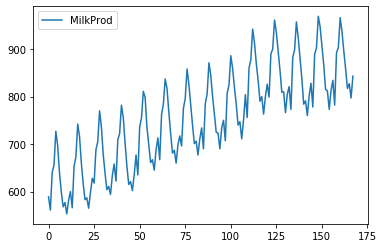

In [7]:
df = pd.read_csv('D:/data/csv/milkProd.csv')
ts = df['MilkProd']
df.plot();

In [8]:
val_prop = 0.7
df_train = df[:int(df.shape[0] * val_prop)]
df_test = df[int(df.shape[0] * val_prop):]
df.shape, df_train.shape, df_test.shape

((168, 2), (117, 2), (51, 2))

In [12]:
model = sma.tsa.statespace.SARIMAX(df_train['MilkProd'], order=(0, 1, 2), seasonal_order=(0, 1, 2, 12), enforce_invertibility=False, enforce_stationarity=False)
fit = model.fit()

In [13]:
pred = fit.get_prediction(125, 175)
pred_means = pred.predicted_mean 
#predicted_intervals = p.conf_int(alpha=0.05)
#lower_bounds = predicted_intervals['lower'] + df.data.iloc[-36:-1].rolling(12).mean().dropna().values
#upper_bounds = predicted_intervals['upper'] + df.data.iloc[-36:-1].rolling(12).mean().dropna().values

#sarima_rmse = np.sqrt(np.mean(np.square(df_test.values - p.predicted_mean.values)))

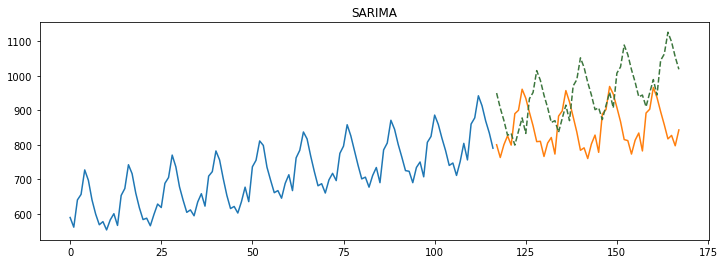

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df_train['MilkProd']);
ax.plot(df_test['MilkProd']);
ax.plot(df_test.index, pred_means.values, color='#3c763d', linestyle='--', label='pred');
#ax.fill_between(df_test.index, lower_bounds, upper_bounds, color='#ff7823', alpha=0.3, label="confidence interval (95%)");
#ax.legend();
ax.set_title("SARIMA");

### Credits & Links

https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051
https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e